In [1]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [2]:
import keras
keras.__version__

'3.3.3'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import os

In [4]:
train_data_dir='archive/train/'
validation_data_dir='archive/test/'

In [5]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    )

validation_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)

validation_generator=validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
from PIL import Image
import scipy
class_labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

img, label=train_generator.__next__()


In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

c:\Users\kaang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,150,087 (4.39 MB)

 Trainable params: 1,150,087 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
train_path="archive/train/"
test_path="archive/test"

numof_train_imgs=0
for root, dirs, files in os.walk(train_path):
    numof_train_imgs+=len(files)
    
numof_test_imgs=0
for root, dirs, files in os.walk(test_path):
    numof_test_imgs+=len(files)

In [10]:
epochs=100

history=model.fit(train_generator, 
                  steps_per_epoch=numof_train_imgs//32,
                  epochs=epochs,
                  validation_data=validation_generator,
                  validation_steps=numof_test_imgs//32,)

model.save('model_file.h5')

Epoch 1/100


c:\Users\kaang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.2351 - loss: 1.8561 - val_accuracy: 0.2472 - val_loss: 1.8134
Epoch 2/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.2812 - loss: 1.8278 - val_accuracy: 0.2000 - val_loss: 1.8164
Epoch 3/100
  1/897 ━━━━━━━━━━━━━━━━━━━━ 2:07 143ms/step - accuracy: 0.3438 - loss: 1.7241

c:\Users\kaang\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


897/897 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.2542 - loss: 1.8156 - val_accuracy: 0.2473 - val_loss: 1.8126
Epoch 4/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.2812 - loss: 1.7354 - val_accuracy: 0.1000 - val_loss: 2.0792
Epoch 5/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.2542 - loss: 1.8074 - val_accuracy: 0.2833 - val_loss: 1.7240
Epoch 6/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.3125 - loss: 1.6912 - val_accuracy: 0.1000 - val_loss: 2.0181
Epoch 7/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.2834 - loss: 1.7489 - val_accuracy: 0.3115 - val_loss: 1.6768
Epoch 8/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.4688 - loss: 1.6754 - val_accuracy: 0.3000 - val_loss: 1.7179
Epoch 9/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.2934 - loss: 1.7291 - val_accuracy: 0.3093 - val_loss: 1.6679
Epoch 10/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.3125 - loss: 1.6542 - val_acc

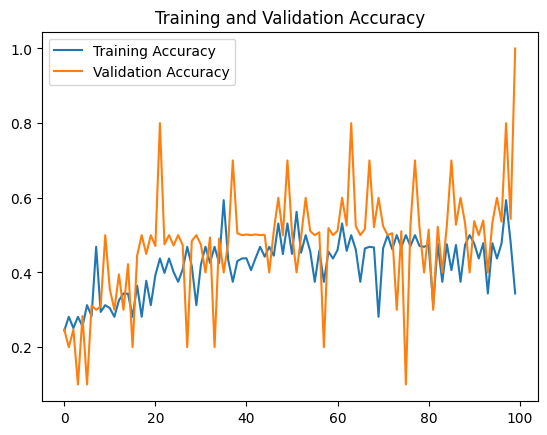

In [11]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

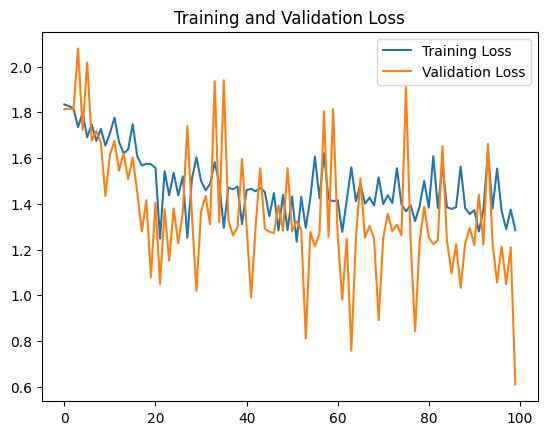

In [12]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()